In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [8]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [9]:
# Clean data
q_low = df['value'].quantile(0.025)
q_high = df['value'].quantile(0.975)
df = df[(df['value'] >= q_low) & (df['value'] <= q_high)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


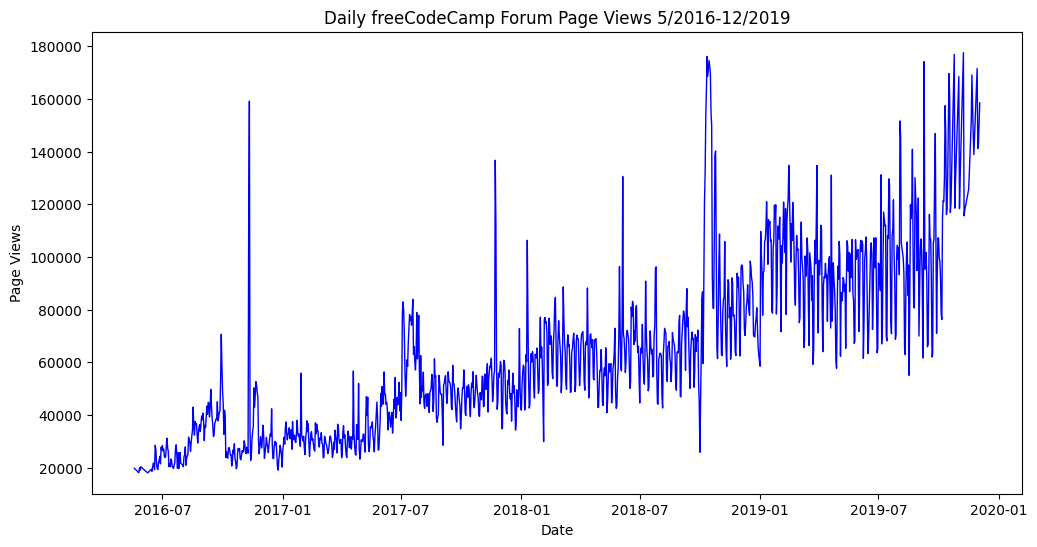

In [11]:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='blue', linestyle='-', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')

In [25]:
df_bar = df.copy()
df_bar['Years'] = df_bar.index.year
df_bar['Months'] = df_bar.index.month_name()
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the month column to a categorical type with the specified order
df_bar['Months'] = pd.Categorical(df_bar['Months'], categories=month_order, ordered=True)

df_bar

,value,Years,Months
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [27]:
df_bar_grouped = df_bar.groupby(['Years', 'Months'], observed=False)['value'].mean().unstack()
# Sort columns by month
df_bar_grouped = df_bar_grouped.sort_index(axis=1)
df_bar_grouped

Months,January,February,March,April,May,June,July,August,September,October,November,December
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0.5, 1.0, 'Average Values by Month')

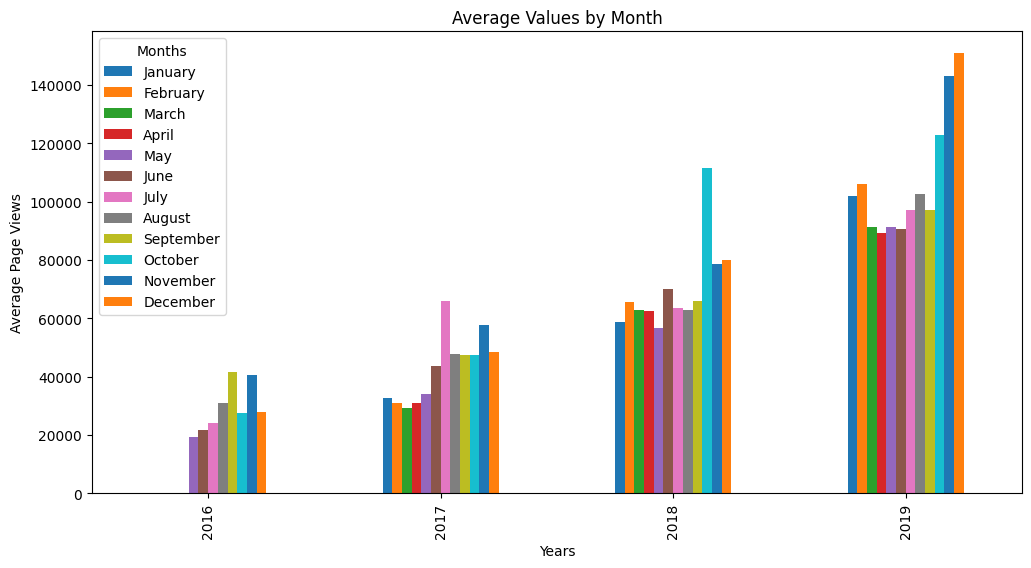

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
df_bar_grouped.plot(kind='bar', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Values by Month')

In [40]:
df_box = df.copy()
df_box['month'] = df_box.index.month_name()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
#df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,November,2019
1234,2019-11-29,171584,November,2019
1235,2019-11-30,141161,November,2019
1236,2019-12-01,142918,December,2019


Text(0, 0.5, 'Page Views')

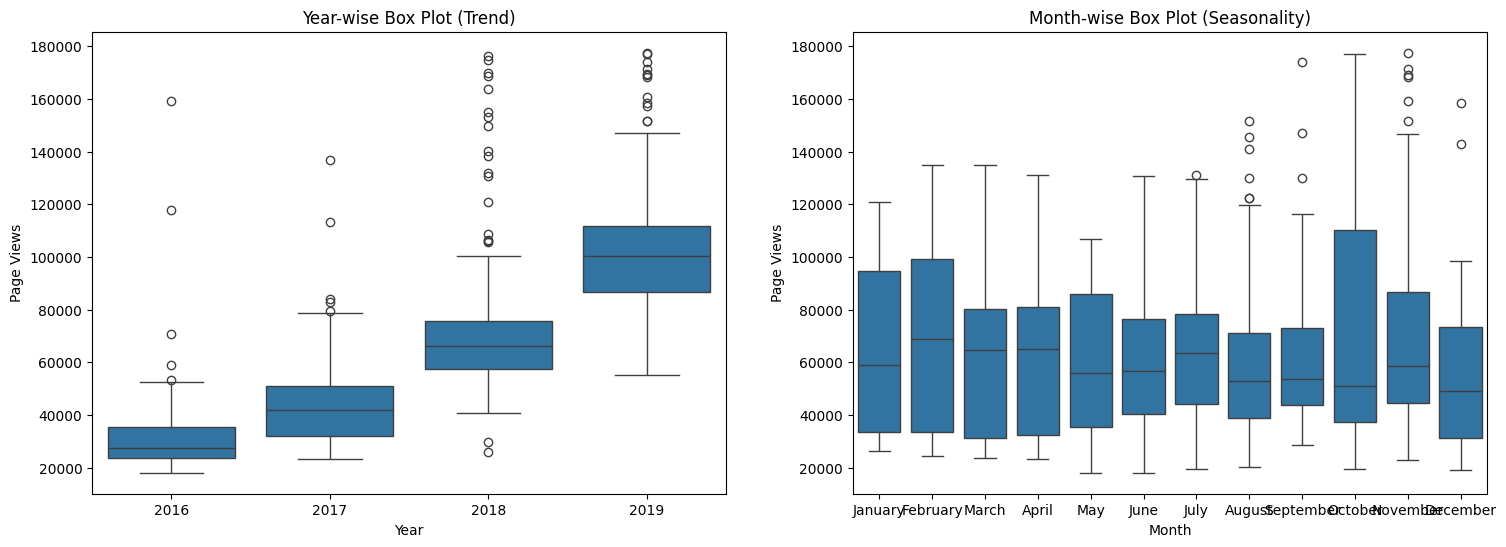

In [38]:
# Draw box plots (using Seaborn)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Year-wise Box Plot (Trend)
sns.boxplot(x='year', y='value', data=df_box, ax=axs[0])
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Page Views')
# Month-wise Box Plot (Seasonality)
sns.boxplot(x='month', y='value', data=df_box, ax=axs[1], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
axs[1].set_title('Month-wise Box Plot (Seasonality)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Page Views')